In [1]:
# Ans 1

 # the five most important factors in red wine quality are volatile acidity, chlorides, sulphates, alcohol, and citric acid

# Volatile acidity is negatively  corelated with wine quality
# Chlorides are negatively corelated to wine quality i.e lower chloride rate creates better wine quality
# Wine quality is positively corelated with sulphates i.e higher sulphates yield higher quality wine
# Higher alcohol yields better quality wine, i.e +ve corelation
# Higher citric acid yields better quality wine, i.e +ve corelation

In [2]:
# Ans 2

# The missing data in the wine quality data set during the feature engineering process was handled by using Mean Imputation

# Different imputation techniques have their own advantages and disadvantages. For example, mean imputation is easy to implement and does not require data manipulation. 
# However, it can exclude a large fraction of the original dataset if missing data is abundant and excluded observations could be informative for the analysis.

# Median imputation is also easy to implement and does not require data manipulation. However, it can distort the original variable distribution.

# Mode imputation is easy to implement and preserves the importance of “missing values” if it exists. 
# However, it can distort the distribution of the original variable.

# Arbitrary value imputation is easy to implement and can be used in production. It retains the importance of “missing values” if it exists. 
# However, arbitrary values can create outliers and extra caution is required when selecting the arbitrary value.

In [3]:
# Ans 3

# the key factors that affect students’ performance in exams include: 
#     parental level of education
#     having a better lunch
#     study effort
#     language skills
#     test anxiety.
#     gender

# Analyzing these factors using statistical techniques would involve collecting data on these factors and the students’ exam performance. 
# The data can then be analyzed using techniques such as correlation analysis and regression analysis.

In [2]:
# Ans 4

# Feature engineering is the process of modification and selection of the features of a data set. 
# It helps machine learning algorithms to understand data and 
# determine patterns that can improve the performance of machine learning algorithms.

# I context of student performance data set, we did the following:
# Check Missing values
# Check Duplicates
# Check data type
# Check the number of unique values of each column
# Check statistics of data set
# Check various categories present in the different categorical column

# We obtained the numerical and categorical features of data, and checked the effect of each category on the
# total average of numerical data i.e marks in each subject

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

<Figure size 1200x800 with 0 Axes>

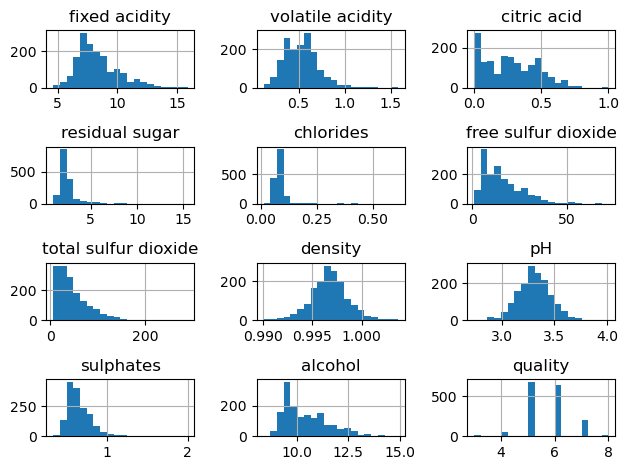

fixed acidity: p-value = 1.5227779442162196e-24 (Not Normal)
volatile acidity: p-value = 2.686385373947307e-16 (Not Normal)
citric acid: p-value = 1.0233944777578548e-21 (Not Normal)
residual sugar: p-value = 0.0 (Not Normal)
chlorides: p-value = 0.0 (Not Normal)
free sulfur dioxide: p-value = 7.699692533903026e-31 (Not Normal)
total sulfur dioxide: p-value = 3.573768919849872e-34 (Not Normal)
density: p-value = 1.9199848821926935e-08 (Not Normal)
pH: p-value = 1.7218767425219994e-06 (Not Normal)
sulphates: p-value = 5.821617678881608e-38 (Not Normal)
alcohol: p-value = 6.63998167657323e-27 (Not Normal)
quality: p-value = 9.524199756965729e-36 (Not Normal)


NameError: name 'stats' is not defined

In [4]:
# Ans 5

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Load the dataset
data = pd.read_csv("winequality-red.csv")

# Display basic information about the dataset
print(data.info())

# Summary statistics of the dataset
print(data.describe())

# Visualize the distribution of each feature using histograms
plt.figure(figsize=(12, 8))
data.hist(bins=20)
plt.tight_layout()
plt.show()

# Check for normality using Shapiro-Wilk test
non_normal_features = []
alpha = 0.05

for column in data.columns:
    stat, p = shapiro(data[column])
    if p < alpha:
        non_normal_features.append(column)
        print(f"{column}: p-value = {p} (Not Normal)")
    else:
        print(f"{column}: p-value = {p} (Normal)")

# Apply transformations to improve normality (e.g., Box-Cox)
for feature in non_normal_features:
    transformed_feature, _ = stats.boxcox(data[feature])
    data[feature] = transformed_feature

# Visualize the transformed distributions
plt.figure(figsize=(12, 8))
data.hist(bins=20)
plt.tight_layout()
plt.show()


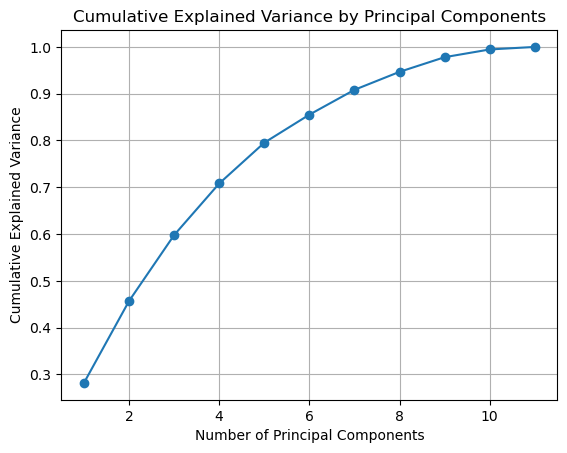

Minimum number of principal components to explain 90% of the variance: 7


In [8]:
# Ans 6

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("winequality-red.csv")

# Separate the features from the target variable (quality)
X = data.drop(columns=["quality"])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.grid()
plt.show()

# Find the minimum number of principal components to explain 90% of the variance
min_components = next(i for i, cum_var in enumerate(cumulative_explained_variance) if cum_var >= 0.90) + 1

print(f"Minimum number of principal components to explain 90% of the variance: {min_components}")
